In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

In [5]:
# Fetch S&P 500 data from 1985 onward
sp500 = yf.download('^GSPC', start='1985-01-01')
sp500_close = sp500['Close'].squeeze()  # Convert to Series
print(f"S&P 500 data from {sp500_close.index[0]} to {sp500_close.index[-1]}")
sp500_close.head()

[*********************100%***********************]  1 of 1 completed

S&P 500 data from 1985-01-02 00:00:00 to 2026-02-12 00:00:00


Date
1985-01-02    165.369995
1985-01-03    164.570007
1985-01-04    163.679993
1985-01-07    164.240005
1985-01-08    163.990005
Name: ^GSPC, dtype: float64

In [3]:
# Fetch US Federal Funds Rate (key interest rate) from FRED
try:
    interest_rate = pdr.get_data_fred('DFF', start='1985-01-01')
    print(f"Federal Funds Rate data from {interest_rate.index[0]} to {interest_rate.index[-1]}")
    interest_rate.head()
except Exception as e:
    print(f"Error fetching from FRED: {e}")
    print("You may need to install pandas_datareader: pip install pandas-datareader")

Federal Funds Rate data from 1985-01-01 00:00:00 to 2026-02-11 00:00:00


In [7]:
# Combine the data and align dates
combined_df = pd.DataFrame({
    'SP500': sp500_close,
    'Interest_Rate': interest_rate['DFF']
})

# Forward fill to handle missing data, then drop any remaining NaN at the start
combined_df = combined_df.ffill().dropna()

# Normalize both series to 100 (first value = 100)
sp500_normalized = (combined_df['SP500'] / combined_df['SP500'].iloc[0]) * 100
interest_rate_normalized = (combined_df['Interest_Rate'] / combined_df['Interest_Rate'].iloc[0]) * 100

print(f"Data range: {combined_df.index[0]} to {combined_df.index[-1]}")
print(f"S&P 500 first value: {combined_df['SP500'].iloc[0]:.2f}")
print(f"Interest Rate first value: {combined_df['Interest_Rate'].iloc[0]:.2f}%")

Data range: 1985-01-02 00:00:00 to 2026-02-12 00:00:00
S&P 500 first value: 165.37
Interest Rate first value: 9.37%


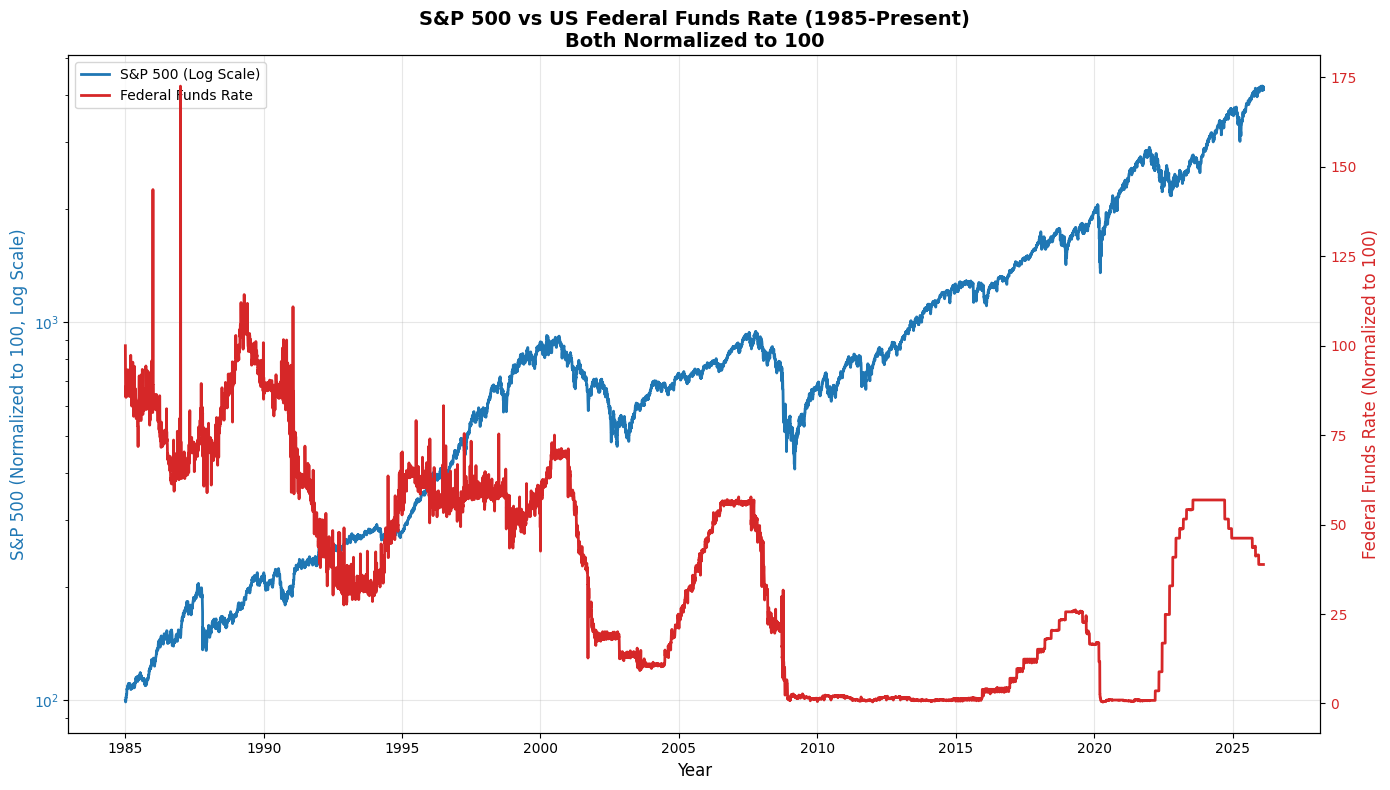

In [8]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot S&P 500 on logarithmic scale (normalized to 100)
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('S&P 500 (Normalized to 100, Log Scale)', color=color, fontsize=12)
ax1.semilogy(sp500_normalized.index, sp500_normalized, color=color, linewidth=2, label='S&P 500 (Log Scale)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for interest rates
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Federal Funds Rate (Normalized to 100)', color=color, fontsize=12)
ax2.plot(interest_rate_normalized.index, interest_rate_normalized, color=color, linewidth=2, label='Federal Funds Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('S&P 500 vs US Federal Funds Rate (1985-Present)\nBoth Normalized to 100', fontsize=14, fontweight='bold')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()